## importing libraries…

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## trying to visualize streets in traffic data set...
# import folium

# m = folium.Map(location=subset_df_start[0]) # seems to be pointing somewhere in Antarctica
# m
# m = folium.Map(location=subset_df_start[0])
# type(subset_df_start[0])
# ny_coords = [40.738, -73.98]
# m = folium.Map(location=ny_coords)
# m

## EDA update for current timeframe
functions from June's code from Ridership Reduction Index Cal

In [2]:
def page_through_ridership_data(start_time,end_time):

    '''
    Name of Function: page_through_data
    Purpose of Function: to read the subway data page by page and return table of all rides between dates
    Inputs: 
            -start_time
            -end_time
    Expected Outputs: 
            -df
    ''' 

    # The $offset is the number of records into a dataset that you want to start, indexed at 0.
    offset  = 0 # start with no offset
    df = pd.DataFrame()
    data = pd.read_json(f"https://data.cityofchicago.org/resource/5neh-572f.json?$where=date%20between%20%27{start_time}%27%20AND%20%27{end_time}%27&$limit=50000&$offset={offset}&$order=date")
    while len(data)==50000: #check num of rows in each page, if num of rows == maximum value for $limit, next page exist
        df = pd.concat([df, data]) #append data to the list
        offset = offset + 50000 #move to next page
        data = pd.read_json(f"https://data.cityofchicago.org/resource/5neh-572f.json?$where=date%20between%20%27{start_time}%27%20AND%20%27{end_time}%27&$limit=50000&$offset={offset}&$order=date")

    return pd.concat([df, data])

In [3]:
start_time = '2018-03-08T00:00:00' # our timeframe for EDA (2018-03-05 to avoid NaNs after time series decomp)
end_time = '2021-03-02T00:00:00' #                         (2021-03-05 to avoid NaNs after time series decomp)
# start_time = '2020-03-01T00:00:00' # during COVID shutdown
# end_time = '2020-12-31T00:00:00'
subway_df = page_through_ridership_data(start_time, end_time)
print(subway_df.shape)
subway_df.head()

(156343, 5)


,station_id,stationname,date,daytype,rides
0,41180,Kedzie-Brown,2018-03-08,W,2054
1,41450,Chicago/State,2018-03-08,W,12687
2,40170,Ashland-Lake,2018-03-08,W,2559
3,40670,Western/Milwaukee,2018-03-08,W,5636
4,40100,Morse,2018-03-08,W,4632


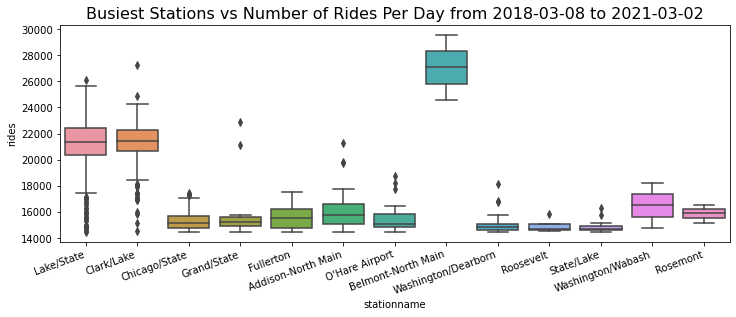

In [4]:
# L train stations with the most rides per day
# 99th percentile chosen to keep plot from being too crowded
fig, ax = plt.subplots(figsize=(12,4))
busiest_subway_df = subway_df[subway_df['rides'] > subway_df['rides'].quantile(0.99)]

sns.boxplot(x='stationname', y='rides', data=busiest_subway_df, ax=ax)
plt.title(f"Busiest Stations vs Number of Rides Per Day from {start_time.split('T')[0]} to {end_time.split('T')[0]}",
         fontsize=16)
plt.xticks(rotation=20, ha='right');

Now the busiest stations are
* Belmont-North Main (Red, Brown, Purple, Blue lines)
* Lake/State (Red Line)
* Clark/Lake (Blue, Brown, Green, Orange, Purple, Pink lines)
* Washington/Wabash (Brown, Green, Orange, Purple, Pink lines)
* Addison-North Main (Red, Brown, Blue lines)

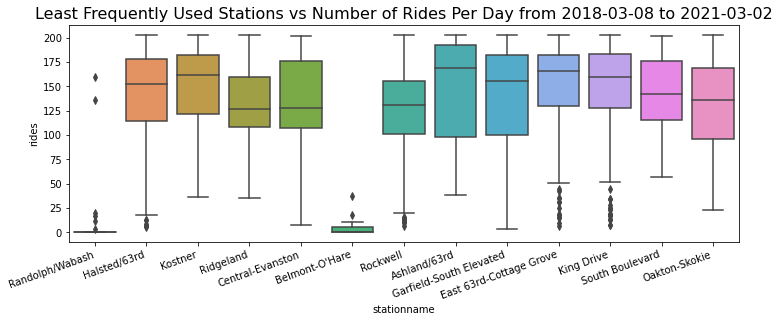

In [44]:
# L train stations with the fewest rides per day
# only first 13 stations from 5th percentile chosen to keep plot from being too crowded
fig, ax = plt.subplots(figsize=(12,4))
slowest_subway_df = subway_df[subway_df['rides'] < subway_df['rides'].quantile(0.05)]
slowest_subway_df_stations = pd.unique(slowest_subway_df['stationname'])[:13]
slowest_subway_subset_df = slowest_subway_df[slowest_subway_df['stationname'].str.contains('|'.join(slowest_subway_df_stations))]

sns.boxplot(x='stationname', y='rides', data=slowest_subway_subset_df, ax=ax)
plt.title(f"Least Frequently Used Stations vs Number of Rides Per Day from {start_time.split('T')[0]} to {end_time.split('T')[0]}",
         fontsize=16)
plt.xticks(rotation=20, ha='right');

In [83]:
ax1.get_xticklabels()

[Text(0, 0, 'Lake/State'),
 Text(1, 0, 'Clark/Lake'),
 Text(2, 0, 'Chicago/State'),
 Text(3, 0, 'Grand/State'),
 Text(4, 0, 'Fullerton'),
 Text(5, 0, 'Addison-North Main'),
 Text(6, 0, "O'Hare Airport"),
 Text(7, 0, 'Belmont-North Main'),
 Text(8, 0, 'Washington/Dearborn'),
 Text(9, 0, 'Roosevelt'),
 Text(10, 0, 'State/Lake'),
 Text(11, 0, 'Washington/Wabash'),
 Text(12, 0, 'Rosemont')]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

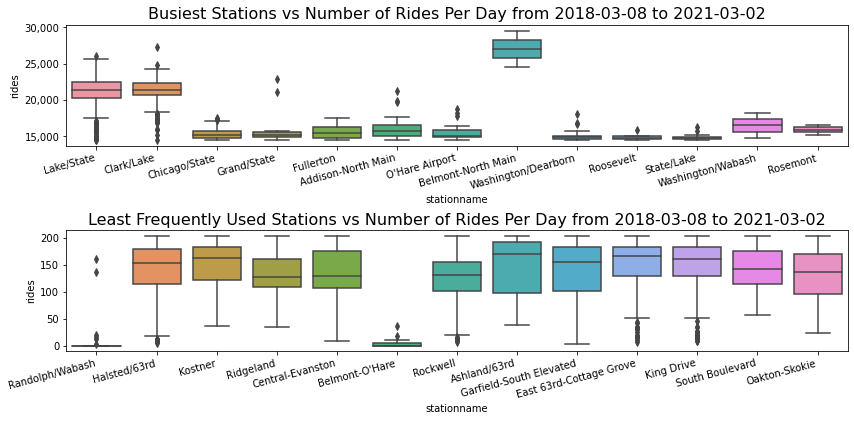

In [85]:
import matplotlib as mpl

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,6), gridspec_kw={'hspace': 0.7})

sns.boxplot(x='stationname', y='rides', data=busiest_subway_df, ax=ax1)
ax1.set_title(f"Busiest Stations vs Number of Rides Per Day from {start_time.split('T')[0]} to {end_time.split('T')[0]}",
         fontsize=16)
ax1.tick_params(axis='x', rotation=15);
[x.set_ha('right') for x in ax1.get_xticklabels()]
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

sns.boxplot(x='stationname', y='rides', data=slowest_subway_subset_df, ax=ax2)
ax2.set_title(f"Least Frequently Used Stations vs Number of Rides Per Day from {start_time.split('T')[0]} to {end_time.split('T')[0]}",
         fontsize=16)
ax2.tick_params(axis='x', rotation=15);
[x.set_ha('right') for x in ax2.get_xticklabels()]


## (previous EDA) Subway ridership
CTA - Ridership - 'L' Station Entries (Socrata Open Data API) https://data.cityofchicago.org/resource/5neh-572f.json \
[SODA API docs for this dataset](https://dev.socrata.com/foundry/data.cityofchicago.org/5neh-572f)

This list shows daily totals of ridership, by station entry, for each 'L' station dating back to 2001. Dataset shows entries at all turnstiles, combined, for each station. Daytypes are as follows: W=Weekday, A=Saturday, U=Sunday/Holiday. See attached readme file for information on how these numbers are calculated.

('date' doesn't actually include timestamps, but format preserved here for later use)

`$where=date between '2021-10-10T12:00:00' and '2021-10-10T14:00:00'`\
`$where=stationname = 'Lawrence'`\
`$where=date > '2021-05-16'`\
`$where=stationname = 'Lawrence' AND date >'2021-05-16'`\
`$where=date > '2021-04-01' & $limit=50000` *currently yields 47619 rows since dataset ends at 2022-02-28*\
SODA queries default to 1000 datapoints, max to 50,000 in SODA 2.0 API (no limit in SODA 2.1)

Encode to UTF-8 with [URL Encoder](https://www.urlencoder.org/)\
[Markdown cheatsheet](https://www.markdownguide.org/cheat-sheet)

In [3]:
url = 'https://data.cityofchicago.org/resource/5neh-572f.json?$where=stationname%20%3D%20%27Lawrence%27'
url = 'https://data.cityofchicago.org/resource/5neh-572f.json?$where=stationname%20%3D%20%27Lawrence%27%20AND%20date%20%3E%272021-05-16%27'

subway_df = pd.read_json(url)
subway_df.head()

,station_id,stationname,date,daytype,rides
0,40770,Lawrence,2021-05-17,W,0
1,40770,Lawrence,2021-05-18,W,2
2,40770,Lawrence,2021-05-19,W,0
3,40770,Lawrence,2021-05-20,W,0
4,40770,Lawrence,2021-05-21,W,1


In [ ]:
subway_df.describe()

In [4]:
subway_df.sort_values(by=['date'], ascending=False)

,station_id,stationname,date,daytype,rides
287,40770,Lawrence,2022-02-28,W,0
286,40770,Lawrence,2022-02-27,U,0
285,40770,Lawrence,2022-02-26,A,0
284,40770,Lawrence,2022-02-25,W,0
283,40770,Lawrence,2022-02-24,W,0
...,...,...,...,...,...
4,40770,Lawrence,2021-05-21,W,1
3,40770,Lawrence,2021-05-20,W,0
2,40770,Lawrence,2021-05-19,W,0
1,40770,Lawrence,2021-05-18,W,2


## Interesting questions to pursue
- Which stations have the highest gate counts per day?
- What happens when we split by rush hour vs not rush hour? *(can't do with this datset)*
- Which stations are most heavily used?

In [137]:
url = 'https://data.cityofchicago.org/resource/5neh-572f.json?$where=date%20%3E%272021-04-01%27&$limit=50000'

subway_df = pd.read_json(url)
subway_df.head()

,station_id,stationname,date,daytype,rides
0,40010,Austin-Forest Park,2021-04-02,W,466
1,40020,Harlem-Lake,2021-04-02,W,1153
2,40030,Pulaski-Lake,2021-04-02,W,637
3,40040,Quincy/Wells,2021-04-02,W,740
4,40050,Davis,2021-04-02,W,957


In [138]:
subway_df.sort_values(by=['date'], ascending=False, inplace=True) # sorts actual df, not copy
subway_df.describe()

,station_id,rides
count,47619.000000,47619.000000
mean,40786.223776,1396.511876
std,460.372282,1358.904508
min,40010.000000,0.000000
25%,40380.000000,498.000000
50%,40780.000000,964.000000
75%,41180.000000,1790.000000
max,41700.000000,14381.000000


In [ ]:
subway_df.columns

Text(0.5, 1.0, 'Boxplot of Stations vs Number of Rides')

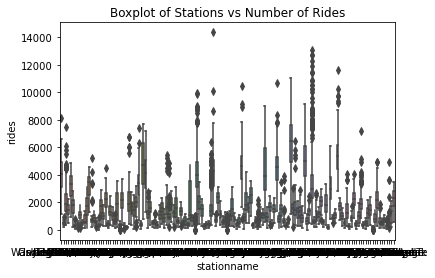

In [7]:
# # check how data are distributed
# sns.boxplot(x='stationname', y='rides', data=subway_df)
# plt.title('Boxplot of Stations vs Number of Rides')
# len(subway_df['stationname'].unique()) # 143 unique stations
# # too many to visualize, need to get outliers

In [8]:
# check what amount of rides make the threshold for each percentile
subway_df['rides'].quantile([0.015,0.5,0.99])

0.015     102.00
0.500     964.00
0.990    6655.82
Name: rides, dtype: float64

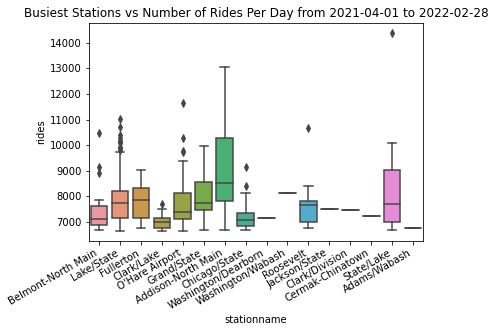

In [9]:
# L train stations with the most rides per day
# 99th percentile chosen to keep plot from being too crowded
busiest_subway_df = subway_df[subway_df['rides'] > subway_df['rides'].quantile(0.99)]

sns.boxplot(x='stationname', y='rides', data=busiest_subway_df)
plt.title('Busiest Stations vs Number of Rides Per Day from 2021-04-01 to 2022-02-28')
plt.xticks(rotation=30, ha='right');
plt.rcParams["figure.figsize"] = (20,3)
#consider outliers-- every dot is a day. So if there's an outlier, it might be a special holiday

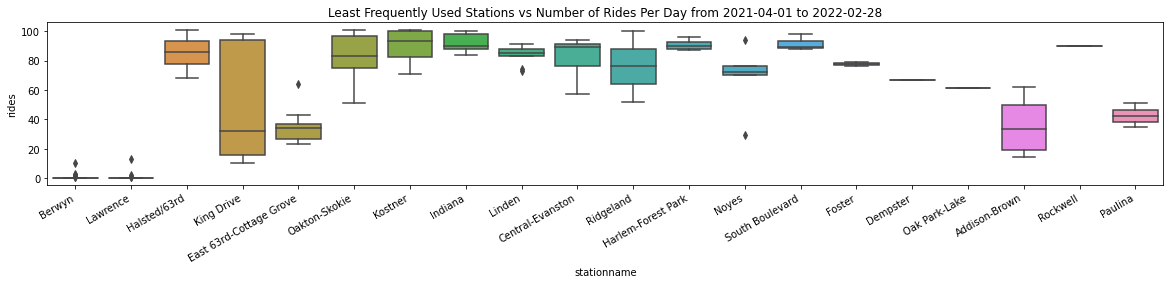

In [10]:
# L train stations with the fewest rides per day
# 1.5th percentile chosen to keep plot from being too crowded
quietest_subway_df = subway_df[subway_df['rides'] < subway_df['rides'].quantile(0.015)]

sns.boxplot(x='stationname', y='rides', data=quietest_subway_df)
plt.title('Least Frequently Used Stations vs Number of Rides Per Day from 2021-04-01 to 2022-02-28')
plt.xticks(rotation=30, ha='right');
plt.rcParams["figure.figsize"] = (20,3)

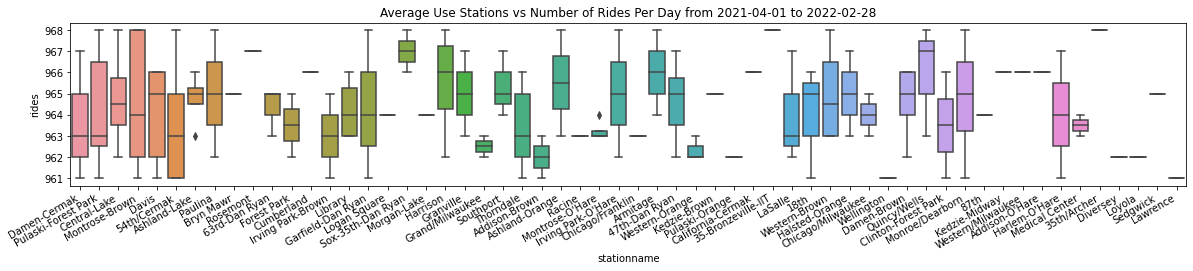

In [11]:
# L train stations with an average amount of rides per day
# range between 49.8th and 50.2nd percentiles chosen to keep plot from being too crowded
typical_subway_df = subway_df[(subway_df['rides'] > subway_df['rides'].quantile(0.498)) & 
                              (subway_df['rides'] < subway_df['rides'].quantile(0.502))]

sns.boxplot(x='stationname', y='rides', data=typical_subway_df)
plt.title('Average Use Stations vs Number of Rides Per Day from 2021-04-01 to 2022-02-28')
plt.xticks(rotation=30, ha='right');
plt.rcParams["figure.figsize"] = (20,3)

In [ ]:
# # figure sizing
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] # reset figure sizing to default (seems to be 6.4,4.8)
# plt.rcParamsDefault["figure.figsize"] = [6,4] # this was the figure size after running the busiest & quietest cases
# fig_width, fig_height = plt.gcf().get_size_inches() # find out current figure size
# print(fig_width, fig_height)

busiest stations, State/Lake, seems to have massive outlier when ridership goes up exponentially --> **why is this?**

In [13]:
busiest_subway_df[busiest_subway_df['stationname'].str.contains('State/Lake')]
# # try to parse exact weekday from historic date
# pd.to_datetime(busiest_subway_df[busiest_subway_df['stationname'].str.contains('State/Lake')].date).dt.dayofweek;

,station_id,stationname,date,daytype,rides
24190,40260,State/Lake,2021-09-18,A,6993
24047,40260,State/Lake,2021-09-17,W,7769
23904,40260,State/Lake,2021-09-16,W,6685
23046,40260,State/Lake,2021-09-10,W,7000
21330,40260,State/Lake,2021-08-29,U,7636
21187,40260,State/Lake,2021-08-28,A,10079
18327,40260,State/Lake,2021-08-08,U,8678
18184,40260,State/Lake,2021-08-07,A,14381


seems to be due to special weekend events on 2021-08-07 and 2021-08-28

## Ridership by day of week
how does use of stations change by day of week?

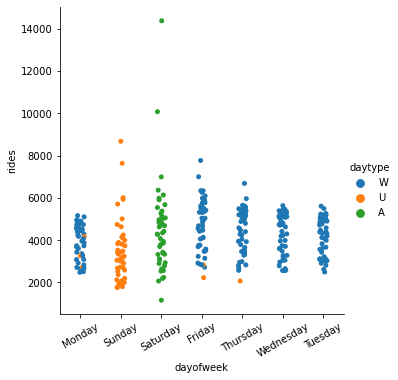

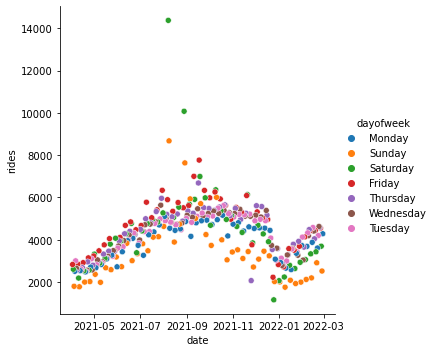

In [371]:
# ridership over time in dataset for State/Lake station
stlk_df = subway_df[subway_df['stationname'].str.contains('State/Lake')].assign(dayofweek=subway_df['date'].dt.day_name())
sns.catplot(x='dayofweek', y='rides', data=stlk_df, kind='strip', hue='daytype') # check that "daytype" field is correct
plt.xticks(rotation=30)
sns.relplot(x='date', y='rides', hue='dayofweek', data=stlk_df) # see general distribution over time

In [374]:
# # testing out overlay feature (swarm on violinplot)
# ax = sns.violinplot(x='dayofweek', y='rides', data=stlk_df, hue='daytype', inner=None)
# ax = sns.swarmplot(x='dayofweek', y='rides', data=stlk_df, color='white', edgecolor='gray')

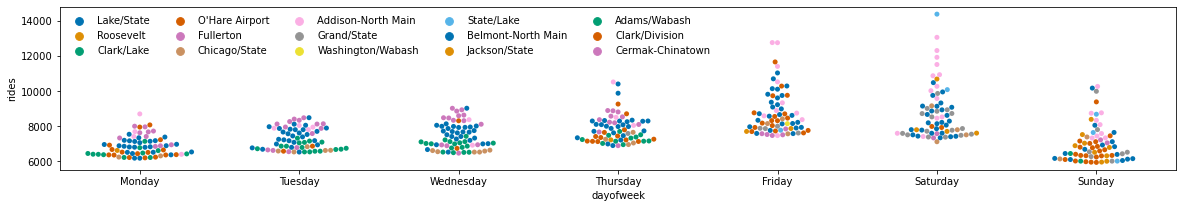

In [377]:
# break up dataset into days of week and stations with highest ridership during those days
day_df = subway_df.assign(dayofweek=subway_df['date'].dt.day_name())
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# for each day of the week, extract the stations with the highest ridership in the 99th (or quant-th) percentile
quant = 0.99
test_df = day_df[day_df['dayofweek'].str.contains(days[0])]
busy_mon_df = test_df[test_df['rides'] > test_df['rides'].quantile(quant)]
test_df = day_df[day_df['dayofweek'].str.contains(days[1])]
busy_tue_df = test_df[test_df['rides'] > test_df['rides'].quantile(quant)]
test_df = day_df[day_df['dayofweek'].str.contains(days[2])]
busy_wed_df = test_df[test_df['rides'] > test_df['rides'].quantile(quant)]
test_df = day_df[day_df['dayofweek'].str.contains(days[3])]
busy_thu_df = test_df[test_df['rides'] > test_df['rides'].quantile(quant)]
test_df = day_df[day_df['dayofweek'].str.contains(days[4])]
busy_fri_df = test_df[test_df['rides'] > test_df['rides'].quantile(quant)]
test_df = day_df[day_df['dayofweek'].str.contains(days[5])]
busy_sat_df = test_df[test_df['rides'] > test_df['rides'].quantile(quant)]
test_df = day_df[day_df['dayofweek'].str.contains(days[6])]
busy_sun_df = test_df[test_df['rides'] > test_df['rides'].quantile(quant)]

# group all weekday subsets into one big dataframe
busy_wk_df = pd.concat([busy_mon_df, busy_tue_df, busy_wed_df, busy_thu_df, busy_fri_df, busy_sat_df, busy_sun_df])

# plot distribution of busiest stations per day of week
ax = sns.swarmplot(x='dayofweek', y='rides', hue='stationname', palette='colorblind', data=busy_wk_df)
sns.move_legend(ax, 'upper left', bbox_to_anchor=(0,1), ncol=5, title=None, frameon=False)

Text(0.5, 1.0, 'Average ridership per day at top 1% busiest Chicago stations')

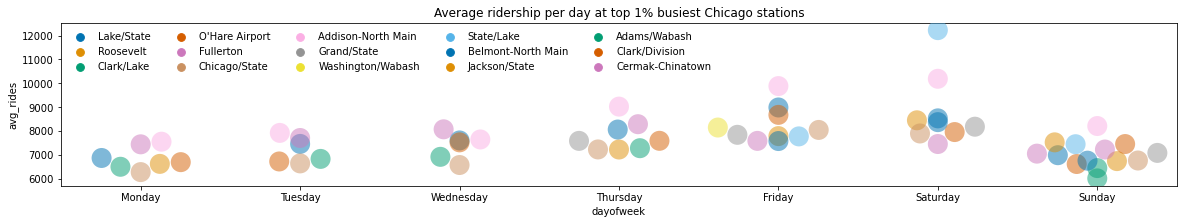

In [381]:
# average rides per day of week for each station
busy_wk_station_mean_df = pd.DataFrame(columns=['station_id', 'stationname', 'dayofweek', 'avg_rides'])
busy_wk_station_mean_df['station_id'] = busy_wk_df['station_id'].drop_duplicates()
busy_wk_station_mean_df['stationname'] = busy_wk_df['stationname'].drop_duplicates()
busy_wk_station_mean_df = pd.concat([busy_wk_station_mean_df]*7, ignore_index=True)

for name in pd.unique(busy_wk_df['stationname']):
    test_df = busy_wk_station_mean_df[busy_wk_station_mean_df['stationname'].str.contains(name)]
    busy_wk_station_mean_df.iloc[test_df.index, 2] = days
    busy_wk_station_mean_df.iloc[test_df.index, 3] =[busy_mon_df[busy_mon_df['stationname'].str.contains(name)]['rides'].mean(),
                                                     busy_tue_df[busy_tue_df['stationname'].str.contains(name)]['rides'].mean(),
                                                     busy_wed_df[busy_wed_df['stationname'].str.contains(name)]['rides'].mean(),
                                                     busy_thu_df[busy_thu_df['stationname'].str.contains(name)]['rides'].mean(),
                                                     busy_fri_df[busy_fri_df['stationname'].str.contains(name)]['rides'].mean(),
                                                     busy_sat_df[busy_sat_df['stationname'].str.contains(name)]['rides'].mean(),
                                                     busy_sun_df[busy_sun_df['stationname'].str.contains(name)]['rides'].mean()]
    
    
busy_wk_station_mean_df
# ax = sns.scatterplot(x='dayofweek', y='avg_rides', size='avg_rides', hue='stationname', 
#                      sizes=(10,1000), alpha=0.5, palette='colorblind',
#                      data=busy_wk_station_mean_df)
ax = sns.swarmplot(x='dayofweek', y='avg_rides', hue='stationname', palette='colorblind', size=20, alpha=0.5,
                   data=busy_wk_station_mean_df)
sns.move_legend(ax, 'upper left', bbox_to_anchor=(0,1), ncol=5, title=None, frameon=False)
plt.title('Average ridership per day at top 1% busiest Chicago stations')

# Busiest stations by day (based on average rides)
- Monday: **Addison-North Main**
- Tuesday: **Addison-North Main**
- Wednesday: ~~Cermak-Chinatown~~ Fullerton (shares colors w/ Cermak)
- Thursday: **Addison-North Main**
- Friday: **Addison-North Main**
- Saturday: State/Lake
- Sunday: **Addison-North Main**

Addison-North Main seems to be busiest

Text(0.5, 1.0, 'Median ridership per day at top 1% busiest Chicago stations')

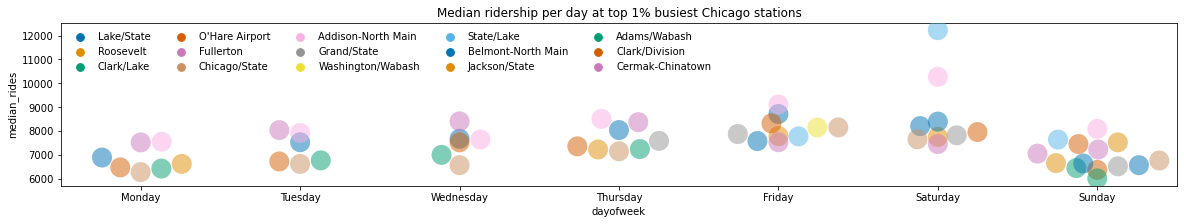

In [382]:
# median rides per day of week for each station, in case it differs a lot from average
busy_wk_station_medn_df = pd.DataFrame(columns=['station_id', 'stationname', 'dayofweek', 'median_rides'])
busy_wk_station_medn_df['station_id'] = busy_wk_df['station_id'].drop_duplicates()
busy_wk_station_medn_df['stationname'] = busy_wk_df['stationname'].drop_duplicates()
busy_wk_station_medn_df = pd.concat([busy_wk_station_medn_df]*7, ignore_index=True)

for name in pd.unique(busy_wk_df['stationname']):
    test_df = busy_wk_station_medn_df[busy_wk_station_medn_df['stationname'].str.contains(name)]
    busy_wk_station_medn_df.iloc[test_df.index, 2] = days
    busy_wk_station_medn_df.iloc[test_df.index, 3] =[busy_mon_df[busy_mon_df['stationname'].str.contains(name)]['rides'].median(),
                                                     busy_tue_df[busy_tue_df['stationname'].str.contains(name)]['rides'].median(),
                                                     busy_wed_df[busy_wed_df['stationname'].str.contains(name)]['rides'].median(),
                                                     busy_thu_df[busy_thu_df['stationname'].str.contains(name)]['rides'].median(),
                                                     busy_fri_df[busy_fri_df['stationname'].str.contains(name)]['rides'].median(),
                                                     busy_sat_df[busy_sat_df['stationname'].str.contains(name)]['rides'].median(),
                                                     busy_sun_df[busy_sun_df['stationname'].str.contains(name)]['rides'].median()]
    
    
busy_wk_station_medn_df
# ax = sns.scatterplot(x='dayofweek', y='median_rides', size='avg_rides', hue='stationname', 
#                      sizes=(10,1000), alpha=0.5, palette='colorblind',
#                      data=busy_wk_station_medn_df)
ax = sns.swarmplot(x='dayofweek', y='median_rides', hue='stationname', palette='colorblind', size=20, alpha=0.5,
                   data=busy_wk_station_medn_df)
sns.move_legend(ax, 'upper left', bbox_to_anchor=(0,1), ncol=5, title=None, frameon=False)
plt.title('Median ridership per day at top 1% busiest Chicago stations')

# Busiest stations by day (based on median rides)
- Monday: **Addison-North Main**
- Tuesday: ~~Cermak-Chinatown~~ Fullerton
- Wednesday: ~~Cermak-Chinatown~~ Fullerton
- Thursday: **Addison-North Main**
- Friday: **Addison-North Main**
- Saturday: State/Lake
- Sunday: **Addison-North Main**

Addison-North Main still seems to be busiest
\
\
going by the [system map](https://www.transitchicago.com/maps/system/),
**Addison** is on the Red, Purple Express, Brown, and Blue Lines
\
**Addison-North Main** might just be on the Red and Purple Express Lines

## How do the top 3 busiest stations compare?

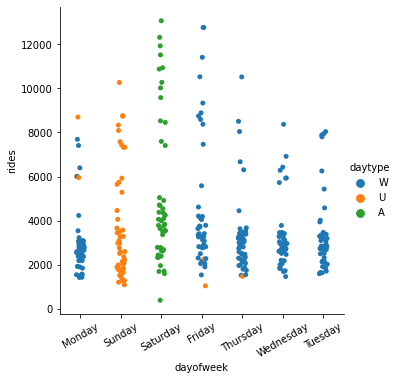

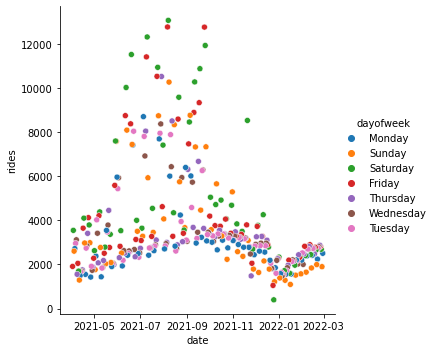

In [384]:
# back to full dataset, ridership over time for Addison-North Main station
addnm_df = subway_df[subway_df['stationname'].str.contains('Addison-North Main')].assign(dayofweek=subway_df['date'].dt.day_name())
sns.catplot(x='dayofweek', y='rides', data=addnm_df, kind='strip', hue='daytype') # check that "daytype" field is correct
plt.xticks(rotation=30)
sns.relplot(x='date', y='rides', hue='dayofweek', data=addnm_df) # see general distribution over time

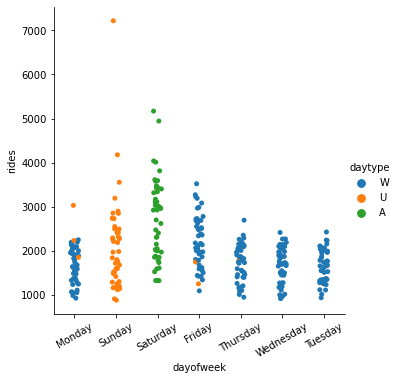

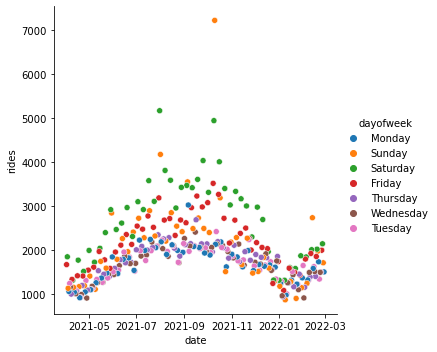

In [385]:
# back to full dataset, ridership over time for Cermak-Chinatown station
crch_df = subway_df[subway_df['stationname'].str.contains('Cermak-Chinatown')].assign(dayofweek=subway_df['date'].dt.day_name())
sns.catplot(x='dayofweek', y='rides', data=crch_df, kind='strip', hue='daytype') # check that "daytype" field is correct
plt.xticks(rotation=30)
sns.relplot(x='date', y='rides', hue='dayofweek', data=crch_df) # see general distribution over time

In [528]:
# stations with potentially confusing colors from previous section
fulr_df = subway_df[subway_df['stationname'].str.contains('Fullerton')].assign(dayofweek=subway_df['date'].dt.day_name())
blnm_df = subway_df[subway_df['stationname'].str.contains('Belmont-North Main')].assign(dayofweek=subway_df['date'].dt.day_name())
lkst_df = subway_df[subway_df['stationname'].str.contains('Lake/State')].assign(dayofweek=subway_df['date'].dt.day_name())

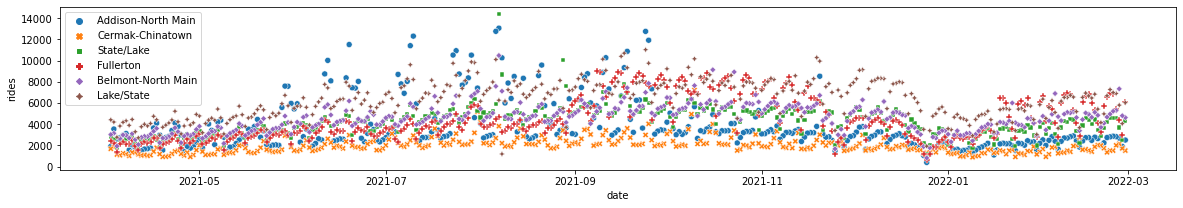

In [535]:
# all 6 stations together, to confirm actual order by plotting
ax = sns.scatterplot(x='date', y='rides', hue='stationname', style='stationname',
                data=pd.concat([addnm_df, crch_df, stlk_df, fulr_df, blnm_df, lkst_df]))
sns.move_legend(ax, loc='upper left',title=None)

seems **Cermak-Chinatown** is actually the **least busy** of these 6 stations & just shared the same color as Fullerton above
\
should be alright to remove it from future analysis and look at remaining "top 5"

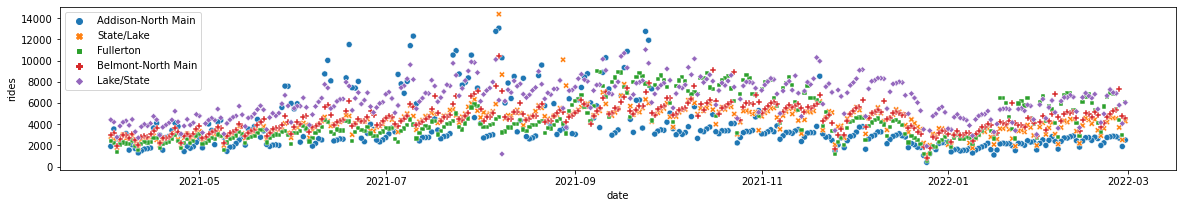

In [589]:
# 5 stations together, less Cermak-Chinatown
ax = sns.scatterplot(x='date', y='rides', hue='stationname', style='stationname',
                data=pd.concat([addnm_df, stlk_df, fulr_df, blnm_df, lkst_df]))
sns.move_legend(ax, loc='upper left',title=None)

## Is there an easier way to do all of this visualization using seaborn docs?

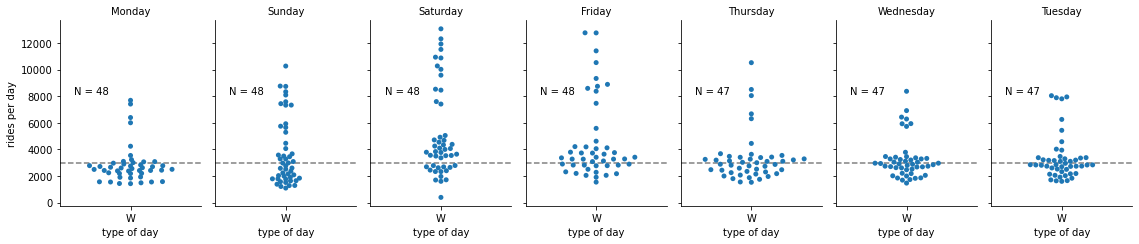

In [423]:
# using FacetGrid to do the same as in previous section, only natively in seaborn
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)

g = sns.FacetGrid(addnm_df, col='dayofweek', height=3.5, aspect=0.65, margin_titles=True)
g.map_dataframe(sns.swarmplot, x='daytype', y='rides')
g.refline(y=addnm_df['rides'].median())
g.map_dataframe(annotate)

g.set_axis_labels("type of day", "rides per day")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

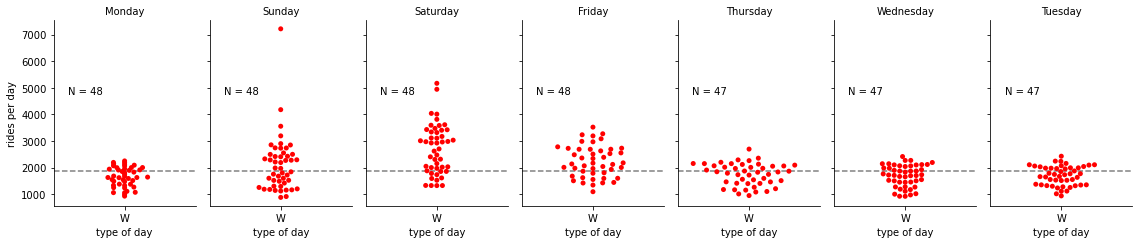

In [458]:
# using FacetGrid to do the same as in previous section, only natively in seaborn
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)

j = sns.FacetGrid(crch_df, col='dayofweek', height=3.5, aspect=0.65, margin_titles=True)
j.map_dataframe(sns.swarmplot, x='daytype', y='rides', color='red')
j.refline(y=crch_df['rides'].median())
j.map_dataframe(annotate)

j.set_axis_labels("type of day", "rides per day")
j.set_titles(col_template="{col_name}", row_template="{row_name}")

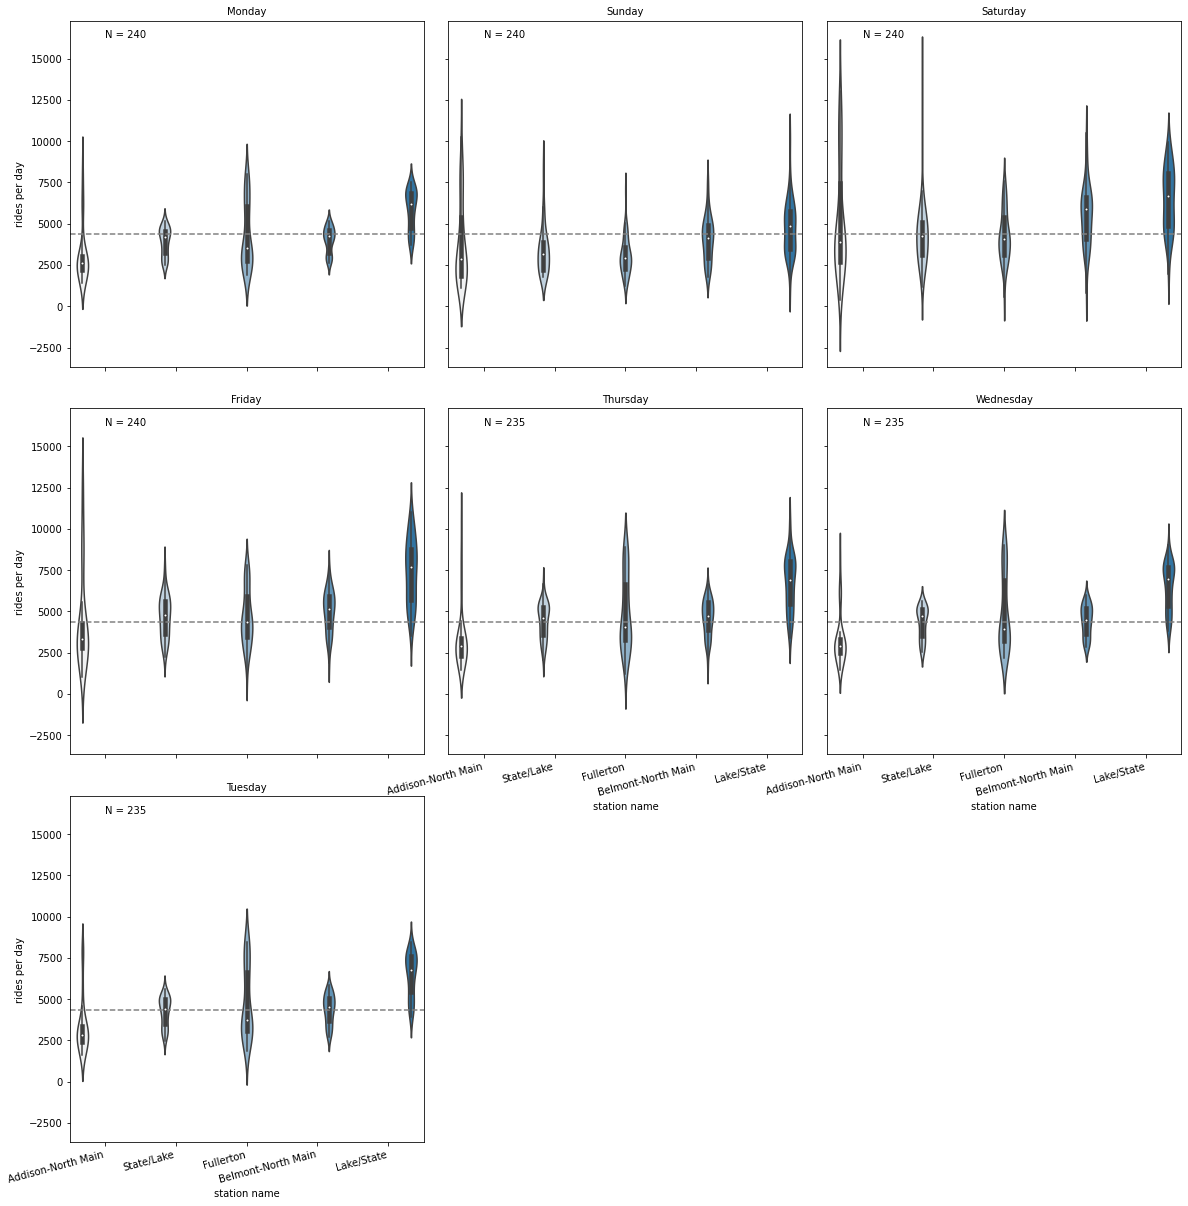

In [588]:
# using FacetGrid to do the same as in previous section, only natively in seaborn
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.1, .95, f"N = {n}", transform=ax.transAxes)

# top_3 = ['Addison-North Main', 'Cermak-Chinatown', 'State/Lake']
# top_3_df = subway_df[subway_df['stationname'].str.contains('|'.join(top_3))]
    
top_5_df = pd.concat([addnm_df, stlk_df, fulr_df, blnm_df, lkst_df])

k = sns.FacetGrid(top_5_df.assign(dayofweek=top_5_df['date'].dt.day_name()), 
                  col='dayofweek', height=5.5, aspect=1, despine=False, col_wrap=3)
k.map_dataframe(sns.violinplot, x='stationname', y='rides', hue='stationname', style='stationname')
k.refline(y=top_5_df['rides'].median())
k.map_dataframe(annotate)

k.set_axis_labels("station name", "rides per day")
k.set_xticklabels(rotation=15, ha='right')
k.set_titles(col_template="{col_name}")

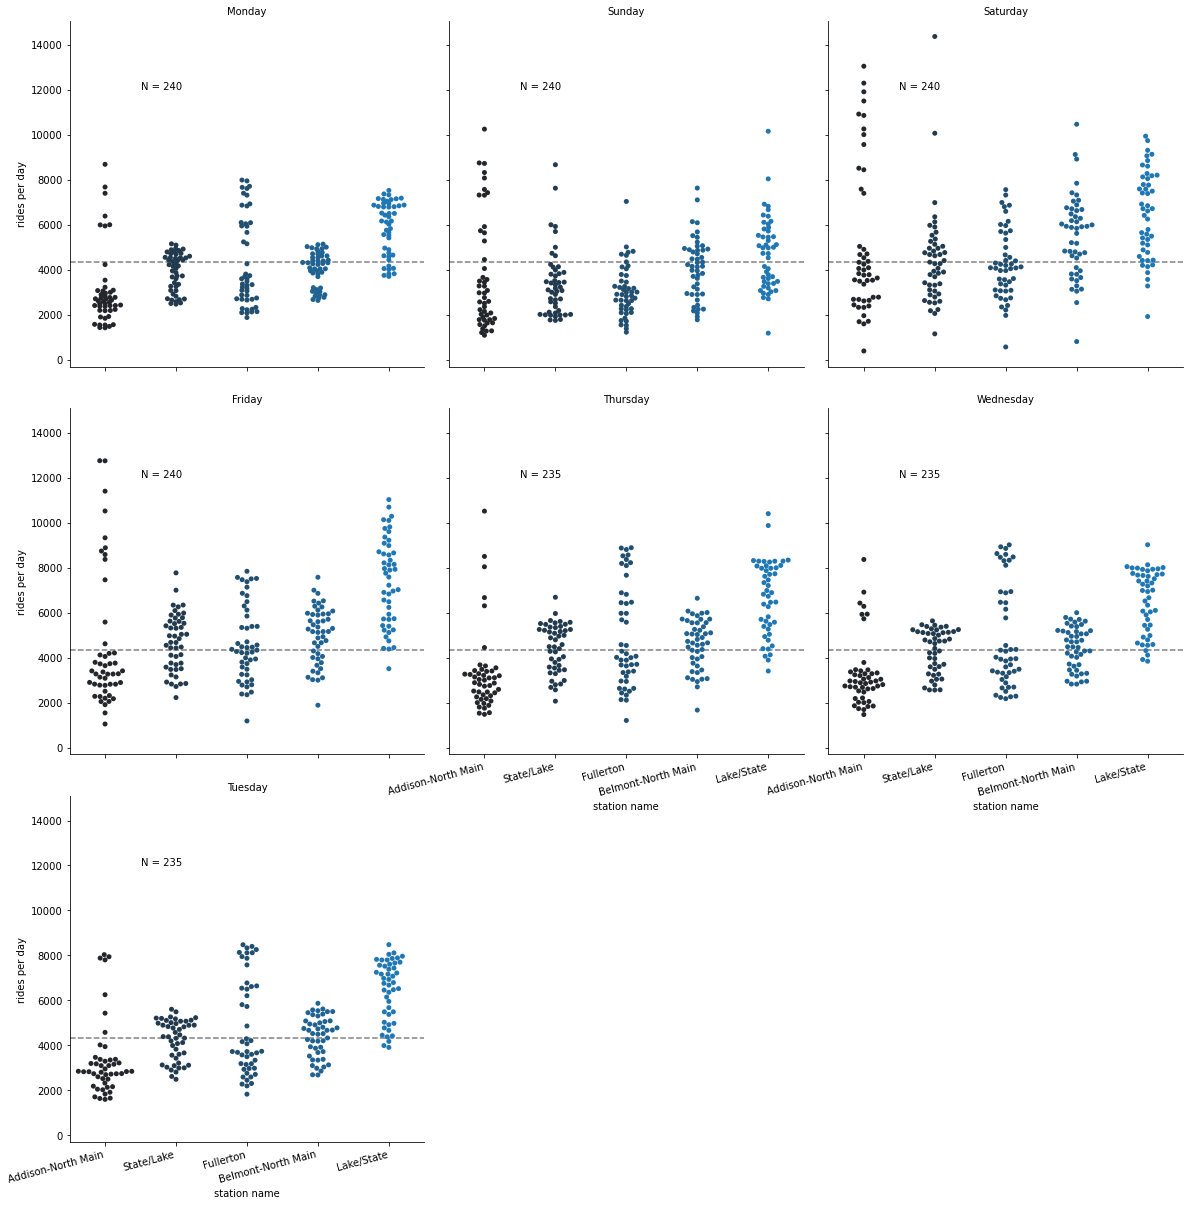

In [552]:
# using FacetGrid to do the same as in previous section, only natively in seaborn
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.2, .8, f"N = {n}", transform=ax.transAxes)

# top_3 = ['Addison-North Main', 'Cermak-Chinatown', 'State/Lake']
# top_3_df = subway_df[subway_df['stationname'].str.contains('|'.join(top_3))]
    
top_5_df = pd.concat([addnm_df, stlk_df, fulr_df, blnm_df, lkst_df])

l = sns.FacetGrid(top_5_df.assign(dayofweek=top_5_df['date'].dt.day_name()), 
                  col='dayofweek', height=5.5, aspect=1, col_wrap=3)
l.map_dataframe(sns.swarmplot, x='stationname', y='rides', hue='stationname')
l.refline(y=top_5_df['rides'].median())
l.map_dataframe(annotate)

l.set_axis_labels("station name", "rides per day")
l.set_xticklabels(rotation=15, ha='right')
l.set_titles(col_template="{col_name}")

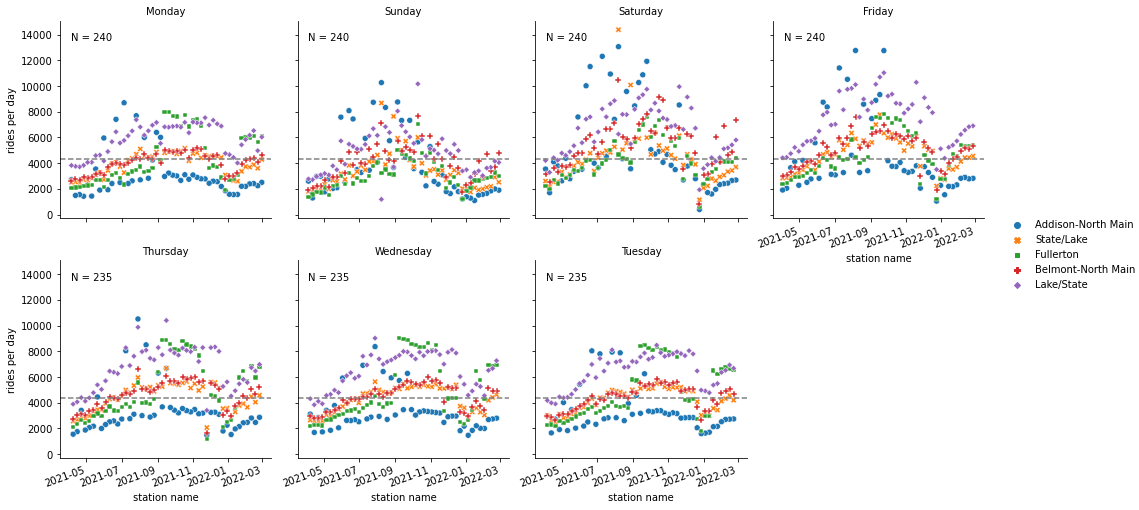

In [586]:
# using FacetGrid to do the same as in previous section, only natively in seaborn
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.05, .9, f"N = {n}", transform=ax.transAxes)

# top_3 = ['Addison-North Main', 'Cermak-Chinatown', 'State/Lake']
# top_3_df = subway_df[subway_df['stationname'].str.contains('|'.join(top_3))]
    
top_5_df = pd.concat([addnm_df, stlk_df, fulr_df, blnm_df, lkst_df])

m = sns.FacetGrid(top_5_df.assign(dayofweek=top_5_df['date'].dt.day_name()), 
                  col='dayofweek', height=3.5, aspect=1, col_wrap=4)
m.map_dataframe(sns.scatterplot, x='date', y='rides', hue='stationname', style='stationname')
m.refline(y=top_5_df['rides'].median())
m.map_dataframe(annotate)

m.set_axis_labels("station name", "rides per day")
m.set_xticklabels(rotation=20, ha='right')
m.set_titles(col_template="{col_name}")
m.add_legend(loc='center right', ncol=1, borderaxespad=0.00001) 
# TODO: figure out how to keep legend in figure w/o blocking anything

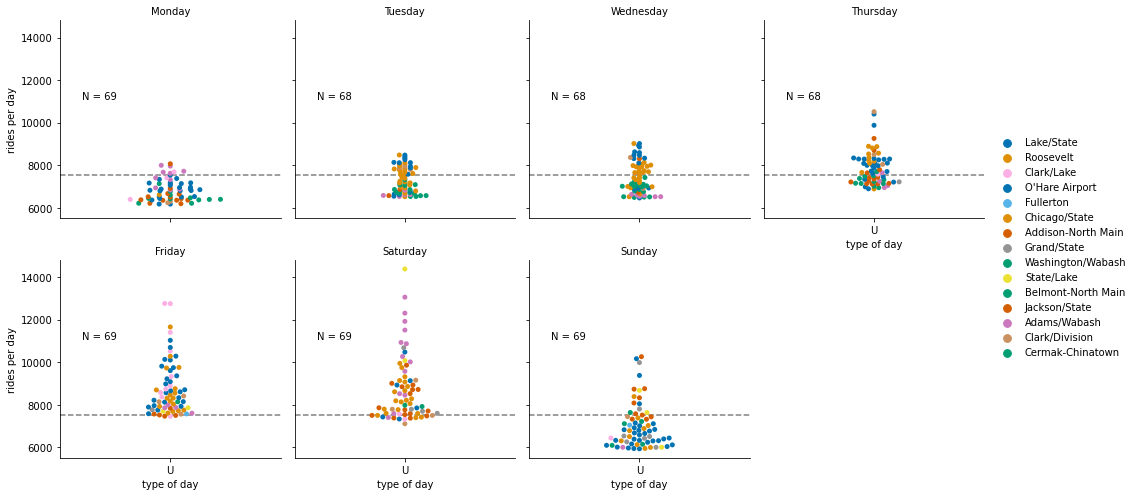

In [570]:
# using FacetGrid to do the same as in previous section, only natively in seaborn
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)

h = sns.FacetGrid(busy_wk_df, col='dayofweek', height=3.5, aspect=1, margin_titles=True, col_wrap=4)
h.map_dataframe(sns.swarmplot, x='daytype', y='rides', hue='stationname', palette='colorblind')
h.refline(y=busy_wk_df['rides'].median())
h.map_dataframe(annotate)

h.set_axis_labels("type of day", "rides per day")
h.set_titles(col_template="{col_name}", row_template="{row_name}")
h.add_legend()

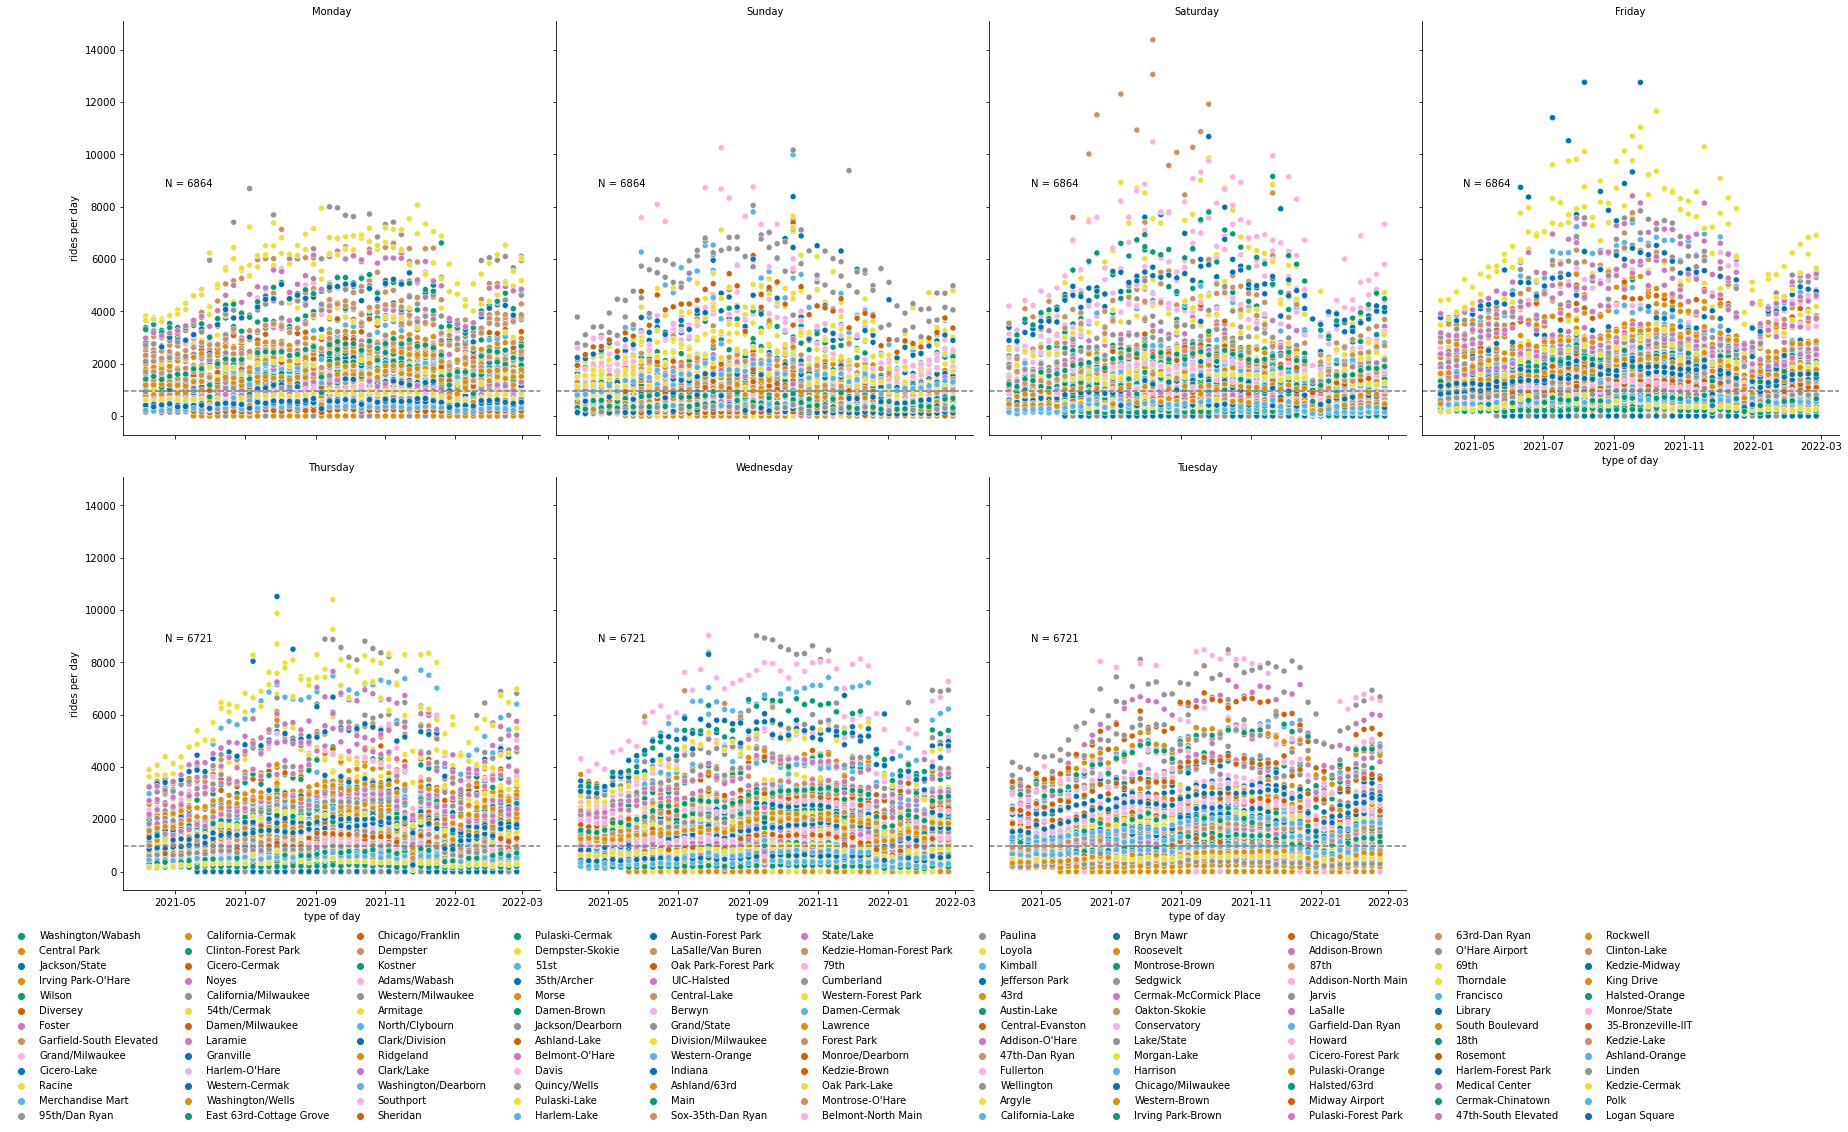

In [452]:
# using FacetGrid to do the same as in previous section, only natively in seaborn
#     and with ALL 40k+ datapoints read in (not subset)
# not worth it...takes a while to run, and not enough distinct colors to distinguish stations
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)
    
i = sns.FacetGrid(subway_df.assign(dayofweek=subway_df['date'].dt.day_name()), 
                  col='dayofweek', height=6.5, aspect=1, margin_titles=True, col_wrap=4)
i.map_dataframe(sns.scatterplot, x='date', y='rides', hue='stationname', palette='colorblind')
i.refline(y=subway_df['rides'].median())
i.map_dataframe(annotate)

i.set_axis_labels("type of day", "rides per day")
i.set_titles(col_template="{col_name}", row_template="{row_name}")
i.add_legend(loc='center left', bbox_to_anchor=(0,-0.1), ncol=11)